In [46]:
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect('/Users/ivanlopatkin/Downloads/okved_20230329.sqlite3')
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

In [5]:
tables

[('natural_person',),
 ('supplier',),
 ('okved',),
 ('legal_entity',),
 ('product',),
 ('company_to_okved',),
 ('company_to_natural_member',),
 ('company_to_legal_member',),
 ('procurement',)]

In [7]:
def extract_tables(table):
    cursor.execute(f"SELECT * FROM {table}")

    rows = cursor.fetchall()
    df = pd.DataFrame(rows, columns=[column[0] for column in cursor.description])
    return df

In [21]:
extract_tables('legal_entity').head()   # юр лицо (main_okved_code - оквед, к которому нужно построить рекомендашку?)

,inn,name,revenue,location,address,region,street,post,natural_representative_inn,legal_representative_inn,main_okved_code
0,7706107510,"ПАО ""НК ""РОСНЕФТЬ""",8.000000e+12,ГОРОД МОСКВА,"115035, ГОРОД МОСКВА, НАБ. СОФИЙСКАЯ, Д.26/1",МОСКВА,НАБ СОФИЙСКАЯ,ГЛАВНЫЙ ИСПОЛНИТЕЛЬНЫЙ\nДИРЕКТОР,770370393938,None,06.10.1
1,7736050003,"ПАО ""ГАЗПРОМ""",6.000000e+12,Г.Санкт-Петербург,"197229, Г.Санкт-Петербург, ВН.ТЕР.Г. МУНИЦИПАЛ...",САНКТ-ПЕТЕРБУРГ,ПР-КТ ЛАХТИНСКИЙ,ПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,782506133697,None,46.71
2,5504036333,"ПАО ""ГАЗПРОМ НЕФТЬ""",3.000000e+12,ГОРОД САНКТ-ПЕТЕРБУРГ,"190000, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛ. ПОЧТАМТСКАЯ...",САНКТ-ПЕТЕРБУРГ,УЛ ПОЧТАМТСКАЯ,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,782570676482,None,46.71
3,7708004767,"ПАО ""ЛУКОЙЛ""",2.000000e+12,ГОРОД МОСКВА,"101000, ГОРОД МОСКВА, Б-Р СРЕТЕНСКИЙ, Д.11",МОСКВА,Б-Р СРЕТЕНСКИЙ,ПРЕЗИДЕНТ,770300105713,None,71.12.3
4,7708503727,"ОАО ""РЖД""",2.000000e+12,Г.Москва,"107174, Г.Москва, ВН.ТЕР.Г. МУНИЦИПАЛЬНЫЙ ОКРУ...",МОСКВА,УЛ НОВАЯ БАСМАННАЯ,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР-\nПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,781306504007,None,49.20


natural_representative_inn (legal_entity) == inn (natural_person)

In [11]:
extract_tables('natural_person').head()

,inn,name
0,770370393938,СЕЧИН ИГОРЬ ИВАНОВИЧ
1,782506133697,МИЛЛЕР АЛЕКСЕЙ БОРИСОВИЧ
2,782570676482,ДЮКОВ АЛЕКСАНДР ВАЛЕРЬЕВИЧ
3,770300105713,АЛЕКПЕРОВ ВАГИТ ЮСУФОВИЧ
4,781306504007,БЕЛОЗЁРОВ ОЛЕГ ВАЛЕНТИНОВИЧ


In [14]:
extract_tables('supplier').head()

,id,name,address,url,inn
0,436479,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БОМБ...","Москва, 109431, г. Москва, ул. Привольная, д. ...",https://supl.biz/profiles/436479/,None
1,1103807,ИЛАРАВТО,"Москва, 85км МКАД, Автомобильный проезд 1, стр.1",https://supl.biz/profiles/1103807/,None
2,554234,"ТД ""СИМА-ЛЕНД"" (ООО ""СИМАОПТ"")","Павлово, Черняховского, 86/8",https://supl.biz/profiles/554234/,None
3,1072799,"ПромТехСервис, ООО, торговая компания","Санкт-Петербург, г. Санкт-Петербург, Лиговский...",https://supl.biz/profiles/1072799/,None
4,1658842,"ООО ""Новация""","Владивосток, Владивосток",https://supl.biz/profiles/1658842/,None


In [13]:
extract_tables('okved').head() # Сама расшифровка окведов

,code,name,info,section_code,section_name,numeric_code,parent_numeric_code
0,01,"Растениеводство и животноводство, охота и пред...",Эта группировка включает:\r\n- два основных ви...,A,"Сельское, лесное хозяйство, охота, рыболовство...",10000,0
1,01.1,Выращивание однолетних культур,Эта группировка включает:\r\n- выращивание одн...,A,"Сельское, лесное хозяйство, охота, рыболовство...",11000,10000
2,01.11,"Выращивание зерновых (кроме риса), зернобобовы...",Эта группировка включает:\r\n- все формы выращ...,A,"Сельское, лесное хозяйство, охота, рыболовство...",11100,11000
3,01.11.1,Выращивание зерновых культур,None,A,"Сельское, лесное хозяйство, охота, рыболовство...",11110,11100
4,01.11.11,Выращивание пшеницы,None,A,"Сельское, лесное хозяйство, охота, рыболовство...",11111,11110


In [15]:
extract_tables('product').head()  # target (здесь выбор поставщика для заказчика)

,id,name,price,presence,is_popular,info,tags,url,supplier_id
0,15,"Сваи забивные 30*30,35*35,40*40,сваи составные",750 руб.,Наличие не указано,0.0,Производим и продаем по Москве и Московскому ...,Товары и услуги/Строительные материалы/Железоб...,https://supl.biz/svai-zabivnyie-30-30-35-35-40...,55893
1,16,"Блоки ФБС б/у,блоки фбс новые,фбс «некондиция»",1 600 руб.,Наличие не указано,1.0,Предлагаем к продаже с доставкой или на самовы...,Товары и услуги/Строительные материалы/Железоб...,https://supl.biz/bloki-fbs-b-u-bloki-fbs-novyi...,55893
2,17,"Плиты дорожные 1П,2П,ПДП 3*1,75,ПДН 14",6 500 руб.,Наличие не указано,1.0,"Плиты дорожные 1П,2П,ПДП 3*1,75,ПДН 14\nПредла...",Товары и услуги/Строительные материалы/Железоб...,https://supl.biz/plityi-dorozhnyie-1p-2p-pdp-3...,55893
3,18,"Плиты дорожные б у, ПАГ 14 б/у, ПАГ 18 бу, бло...",1 руб.,Наличие не указано,1.0,"Всегда в наличии полный ассортимент ЖБИ б/у, Ж...",Товары и услуги/Строительные материалы/Железоб...,https://supl.biz/plityi-dorozhnyie-b-u-pag-14-...,55893
4,21,"Плиты перекрытия б/у,пустотные плиты б/у ПК,ПНО",5 000 руб.,Наличие не указано,1.0,"Плиты перекрытия б/у, пустотные плиты б/у ПК, ...",Товары и услуги/Строительные материалы/Железоб...,https://supl.biz/plityi-perekryitiya-b-u-pusto...,55893


In [22]:
extract_tables('product').url.iloc[1]

'https://supl.biz/bloki-fbs-b-u-bloki-fbs-novyie-fbs-nekonditsiya-p16/'

In [16]:
extract_tables('company_to_okved').head()

,company_inn,okved_code
0,7706107510,06.10.1
1,7706107510,06.10.3
2,7706107510,06.20
3,7706107510,08.12
4,7706107510,09.10.1


In [17]:
extract_tables('company_to_natural_member').head()

,company_inn,member_inn,share
0,6670450790,662513097170,100.0
1,5015005970,770200079259,100.0
2,7723849543,773614416289,1.0
3,7703608910,770379555407,100.0
4,7728674093,770511240729,20.0


In [18]:
extract_tables('company_to_legal_member').head()

,company_inn,member_inn,share
0,5003021311,7736050003,100.000000
1,8608048498,7708004767,100.000000
2,4703105075,5504036333,99.990419
3,4703105075,7709359770,0.009581
4,9705074590,7719758808,100.000000


In [20]:
extract_tables('procurement').head() # закупки (main table). 

,id,start_price,object,method,name,customer_inn,executor_inn
0,32110356755,447993.0,Оказание услуг по организации и проведе...,СБ-АСТ: Закупка у единственного поставщика,Оказание услуг по организации и проведе...,5044000102,7736050003
1,32009458795,1183132.8,Оказание услуг газоснабжения,Закупка у единственного поставщика (подрядчика...,Оказание услуг газоснабжения,7729314745,7736050003
2,32008873158,622893.8,Оказание организационных услуг по празднованию...,СБ-АСТ: Закупка у единственного источника,Оказание организационных услуг по празднованию...,5044000102,7736050003
3,32110655889,54677830.0,Поставка нефтепродуктов,Закупка у единственного поставщика (подрядчика...,Поставка нефтепродуктов,5504037369,5504036333
4,32008994576,321300000.0,Поставка сжиженного углеводородного газа,Закупка у единственного поставщика (подрядчика...,Поставка сжиженного углеводородного газа,5504037369,5504036333


In [24]:
customers = extract_tables('legal_entity')
customers.head()

,inn,name,revenue,location,address,region,street,post,natural_representative_inn,legal_representative_inn,main_okved_code
0,7706107510,"ПАО ""НК ""РОСНЕФТЬ""",8.000000e+12,ГОРОД МОСКВА,"115035, ГОРОД МОСКВА, НАБ. СОФИЙСКАЯ, Д.26/1",МОСКВА,НАБ СОФИЙСКАЯ,ГЛАВНЫЙ ИСПОЛНИТЕЛЬНЫЙ\nДИРЕКТОР,770370393938,None,06.10.1
1,7736050003,"ПАО ""ГАЗПРОМ""",6.000000e+12,Г.Санкт-Петербург,"197229, Г.Санкт-Петербург, ВН.ТЕР.Г. МУНИЦИПАЛ...",САНКТ-ПЕТЕРБУРГ,ПР-КТ ЛАХТИНСКИЙ,ПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,782506133697,None,46.71
2,5504036333,"ПАО ""ГАЗПРОМ НЕФТЬ""",3.000000e+12,ГОРОД САНКТ-ПЕТЕРБУРГ,"190000, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛ. ПОЧТАМТСКАЯ...",САНКТ-ПЕТЕРБУРГ,УЛ ПОЧТАМТСКАЯ,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,782570676482,None,46.71
3,7708004767,"ПАО ""ЛУКОЙЛ""",2.000000e+12,ГОРОД МОСКВА,"101000, ГОРОД МОСКВА, Б-Р СРЕТЕНСКИЙ, Д.11",МОСКВА,Б-Р СРЕТЕНСКИЙ,ПРЕЗИДЕНТ,770300105713,None,71.12.3
4,7708503727,"ОАО ""РЖД""",2.000000e+12,Г.Москва,"107174, Г.Москва, ВН.ТЕР.Г. МУНИЦИПАЛЬНЫЙ ОКРУ...",МОСКВА,УЛ НОВАЯ БАСМАННАЯ,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР-\nПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,781306504007,None,49.20


In [31]:
customers.query('inn == "7736050003"')

,inn,name,revenue,location,address,region,street,post,natural_representative_inn,legal_representative_inn,main_okved_code
1,7736050003,"ПАО ""ГАЗПРОМ""",6.000000e+12,Г.Санкт-Петербург,"197229, Г.Санкт-Петербург, ВН.ТЕР.Г. МУНИЦИПАЛ...",САНКТ-ПЕТЕРБУРГ,ПР-КТ ЛАХТИНСКИЙ,ПРЕДСЕДАТЕЛЬ ПРАВЛЕНИЯ,782506133697,None,46.71


In [32]:
orders = extract_tables('procurement')
orders.head()

,id,start_price,object,method,name,customer_inn,executor_inn
0,32110356755,447993.0,Оказание услуг по организации и проведе...,СБ-АСТ: Закупка у единственного поставщика,Оказание услуг по организации и проведе...,5044000102,7736050003
1,32009458795,1183132.8,Оказание услуг газоснабжения,Закупка у единственного поставщика (подрядчика...,Оказание услуг газоснабжения,7729314745,7736050003
2,32008873158,622893.8,Оказание организационных услуг по празднованию...,СБ-АСТ: Закупка у единственного источника,Оказание организационных услуг по празднованию...,5044000102,7736050003
3,32110655889,54677830.0,Поставка нефтепродуктов,Закупка у единственного поставщика (подрядчика...,Поставка нефтепродуктов,5504037369,5504036333
4,32008994576,321300000.0,Поставка сжиженного углеводородного газа,Закупка у единственного поставщика (подрядчика...,Поставка сжиженного углеводородного газа,5504037369,5504036333


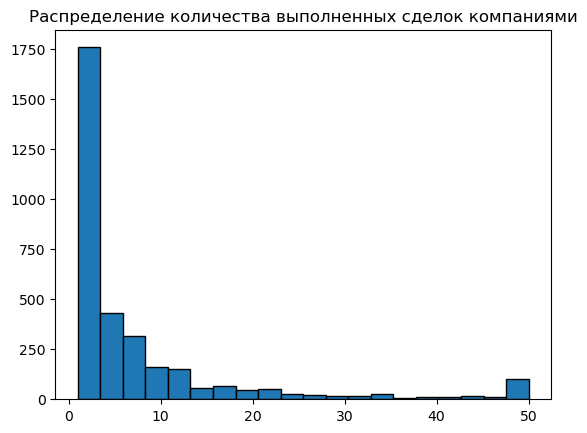

In [40]:
plt.hist(orders.executor_inn.value_counts(), bins=20, edgecolor='black')
plt.title('Распределение количества выполненных сделок компаниями')
plt.show()

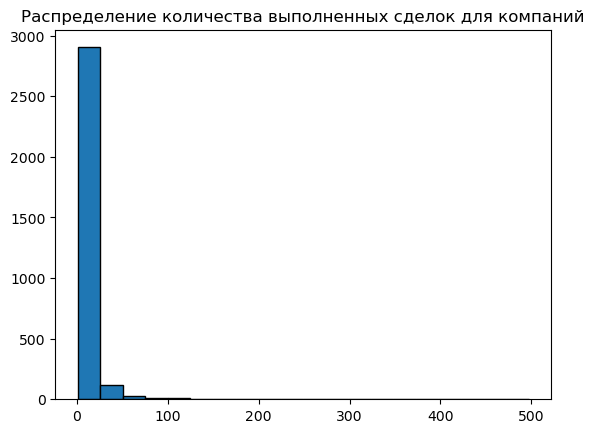

In [56]:
plt.hist(orders.customer_inn.value_counts(), bins=20, edgecolor='black')
plt.title('Распределение количества выполненных сделок для компаний')
plt.show()

In [58]:
company_to_okved = extract_tables('company_to_okved')
company_to_okved.head()

,company_inn,okved_code
0,7706107510,06.10.1
1,7706107510,06.10.3
2,7706107510,06.20
3,7706107510,08.12
4,7706107510,09.10.1


In [68]:
company_to_okved.company_inn.nunique()

50908

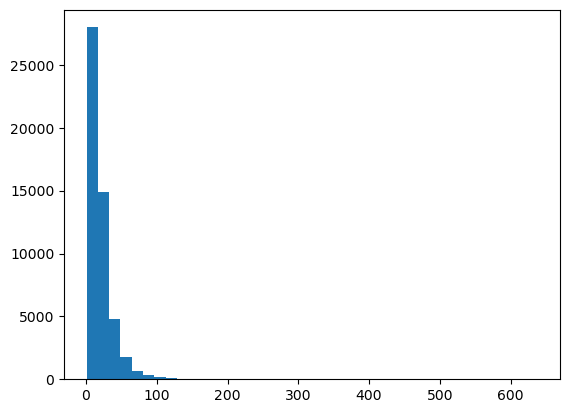

In [65]:
plt.hist(company_to_okved.groupby('company_inn').agg({'okved_code': 'count'}).okved_code, bins=40)
plt.show()

In [73]:
df_grouped = company_to_okved.groupby('company_inn')['okved_code'].agg(list).reset_index()

In [74]:
df_grouped

,company_inn,okved_code
0,1001000742,"[46.46.1, 32.99.9, 38.1, 38.2, 46.38.29, 46.43..."
1,1001001390,"[02.20, 16.10.1, 46.73.1, 46.73.2, 49.3, 52.29..."
2,1001001697,"[33.13, 27.40, 38.1, 38.2, 38.31, 38.32.2, 46...."
3,1001002235,"[46.14.9, 28.12, 28.41, 28.49, 28.95, 28.99, 3..."
4,1001004472,"[10.51, 10.51.2, 10.51.9, 10.82.2, 10.89, 10.8..."
...,...,...
50903,9731077326,"[45.20, 41.10, 41.20, 42.21, 42.22, 43.11, 43...."
50904,9731077982,"[73.11, 18.11, 18.12, 18.13, 18.14, 58.11, 58...."
50905,9731079355,"[49.41, 45.20, 46.71, 49.41.1, 49.41.2, 49.42,..."
50906,9731081330,"[62.01, 61.10, 61.10.4, 61.10.9, 62.02, 62.02...."


Мысль: Написать рекомендашку, после чего запарсить новые тендеры (сразу после написания модели можно начать), прогнать через систему и к сдаче оценить результаты.